In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data():
    
    FertilityRate = pd.read_csv("CSV_data/FertilityRate.csv")
    LifeExp = pd.read_csv("CSV_data/LifeExp_Females.csv")
    Literacy_Female = pd.read_csv("CSV_data/LiteracyRate_FemalesAdult.csv")
    Literacy_Male = pd.read_csv("CSV_data/LiteracyRate_MaleAdult.csv")
    GDP = pd.read_csv("CSV_data/GDP_PerCapita_ConstantDollar.csv")
    
    Fertility_Data = FertilityRate.loc[4:, FertilityRate.columns[6:62]]
    LE_Data = LifeExp.loc[4:, LifeExp.columns[6:62]]
    Literacy_F_Data = Literacy_Female.loc[4:, Literacy_Female.columns[6:62]]
    Literacy_M_Data = Literacy_Male.loc[4:, Literacy_Male.columns[6:62]]
    GDP_Data = GDP.loc[4:, GDP.columns[6:62]]
    Countries = FertilityRate['Data Source'][4:]
    Years = FertilityRate.loc[3, FertilityRate.columns[6:62]]
    
    GDP_array = GDP_Data.values
    Fertility_array = Fertility_Data.values
    LE_array = LE_Data.values
    Literacy_F_array = Literacy_F_Data.values
    Literacy_M_array = Literacy_M_Data.values
    Countries = Countries.values.tolist()
    Years = np.array(Years).astype(int)
    
    return Years, Countries, LE_array, Fertility_array, Literacy_F_array, Literacy_M_array, GDP_array 

In [3]:
Years, Countries, LE_array, Fertility_array, Literacy_F_array, Literacy_M_array,GDP_array = load_data()


In [10]:
#Model including Literacy (Male and Female), Life expectancy (Female) and GDP
empty_LE = ~np.isnan(LE_array)
empty_Fer = ~np.isnan(Fertility_array)
empty_Lit_F = ~np.isnan(Literacy_F_array)
empty_Lif_M = ~np.isnan(Literacy_M_array)
empty_GDP = ~np.isnan(GDP_array)


empty1 = np.logical_and(empty_LE, empty_Fer) 
empty2 = np.logical_and(empty_Lif_M, empty_Lit_F) 
empty3 = (empty_GDP)
empty = np.logical_and(empty1, empty2)
empty = np.logical_and(empty, empty3)

In [11]:
LE_empty = LE_array[empty]
GDP_empty = GDP_array[empty]
Lit_M_empty = Literacy_M_array[empty]
Lit_F_empty = Literacy_F_array[empty]

Y = Fertility_array[empty]

In [12]:
Y = np.reshape(Y, (Y.size,1))   

Y_Res = (Y- np.mean(Y))/np.std(Y)    
LE_Res = (LE_empty-np.mean(LE_empty))/np.std(LE_empty)
GDP_Res = (GDP_empty - np.mean(GDP_empty))/np.std(GDP_empty)
Literacy_M_Res = np.divide(Lit_M_empty, 100)
Literacy_F_Res = np.divide(Lit_F_empty, 100)

X_all = np.array([LE_Res, Literacy_M_Res, Literacy_F_Res, GDP_Res]).T
X_all_PlusConst = sm.add_constant(X_all)

In [13]:
Model = sm.OLS((Y_Res), X_all_PlusConst).fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2725.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:00:09   Log-Likelihood:                -1153.3
No. Observations:                2196   AIC:                             2317.
Df Residuals:                    2191   BIC:                             2345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4209      0.103     13.731      0.0

Text(0, 0.5, 'Fertility per woman')

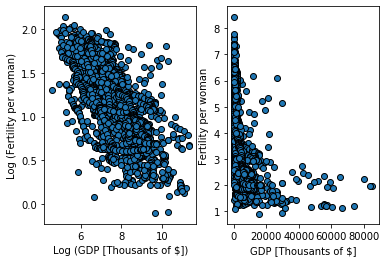

In [14]:
fig = plt.figure()
ax = plt.subplot(121)
plt.scatter(np.log(GDP_array[empty]), np.log(Fertility_array[empty]), edgecolors = 'black')
plt.xlabel("Log (GDP [Thousants of $])")
plt.ylabel("Log (Fertility per woman)")
ax = plt.subplot(122)
plt.scatter((GDP_array[empty]), (Fertility_array[empty]), edgecolors = 'black')
plt.xlabel("GDP [Thousants of $]")
plt.ylabel("Fertility per woman")